# Key Concepts 

#### GHI (Global Horizontal Irradiance) [W/m2]: 
Se refiere a la radiación solar total recibida por la superficie horizontal de la Tierra, incluyendo la radiación directa del sol, la radiación difusa (reflejada por la atmósfera) y la radiación del cielo nublado.
#### DNI (Direct Normal Irradiance) [W/m2]: 
Es la cantidad de radiación solar directa recibida por un panel solar colocado perpendicularmente al sol. No incluye la radiación difusa ni la radiación reflejada.
#### DHI (Diffuse Horizontal Irradiance) [W/m2]: 
Se refiere a la radiación solar difusa que llega a la superficie de la Tierra proveniente de todas las direcciones del cielo, excepto la radiación directa del sol.
#### EBH (Extra-terrestrial Beam Horizontal): 
Es la radiación solar directa que llegaría a la superficie de la Tierra si la atmósfera no estuviera presente. Representa la radiación solar directa del sol en el espacio.
#### Cloud Opacity (Cloudiness): 
Es la medida de la opacidad de las nubes en el cielo. Indica cuánto del cielo está cubierto por nubes y afecta la cantidad de radiación solar que llega a la superficie.

## Import Libraries

In [42]:
import numpy as np            # manejo arreglos
import pandas as pd           # manipulación dataframes      
import matplotlib.pyplot as plt    # Realiza graficas
import pytz                        # manipulación de zonas horarias                     
from datetime import datetime, date, timedelta  # manipulacion de fechas y horas

## Read CSV File

In [43]:
# Cargar los datos del archivo CSV
data = pd.read_csv('../Data/Raw/solcast_allParameters_2023_PT5M.csv', sep=',')

# Crear un dataframe con los datos
df = pd.DataFrame(data)
# Cambiar el nombre de la columna 'dni' a 'DHI'
df = df.rename(columns={'dni': 'DHI'})
# Cambiar el nombre de la columna 'ghi' a 'GHI'
df = df.rename(columns={'ghi': 'GHI'})

# Extraer los 4 caracteres siguientes a la letra 'T' en la columna 'PeriodEnd'
df['Time'] = df['period_end'].str.extract('T(\d{2}:\d{2})')
# Extraer los 10 caracteres anteriores a la letra 'T' en la columna 'PeriodEnd'
df['Date'] = df['period_end'].str.extract('(\d{4}-\d{2}-\d{2})')

print(df.shape)
df.head()

<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
/var/folders/pz/w3bcsy5x2wgb_7c0fs6qmkp80000gn/T/ipykernel_18735/1818990498.py:12: SyntaxWarning: invalid escape sequence '\d'
  df['Time'] = df['period_end'].str.extract('T(\d{2}:\d{2})')
/var/folders/pz/w3bcsy5x2wgb_7c0fs6qmkp80000gn/T/ipykernel_18735/1818990498.py:14: SyntaxWarning: invalid escape sequence '\d'
  df['Date'] = df['period_end'].str.extract('(\d{4}-\d{2}-\d{2})')


(105408, 12)


,air_temp,albedo,clearsky_ghi,clearsky_gti,cloud_opacity,dewpoint_temp,GHI,gti,period_end,period,Time,Date
0,11,0.14,0,0,79.5,10.3,0,0,2023-01-01T00:05:00Z,PT5M,00:05,2023-01-01
1,11,0.14,0,0,79.5,10.2,0,0,2023-01-01T00:10:00Z,PT5M,00:10,2023-01-01
2,11,0.14,0,0,79.5,10.2,0,0,2023-01-01T00:15:00Z,PT5M,00:15,2023-01-01
3,11,0.14,0,0,79.5,10.2,0,0,2023-01-01T00:20:00Z,PT5M,00:20,2023-01-01
4,11,0.14,0,0,79.5,10.2,0,0,2023-01-01T00:25:00Z,PT5M,00:25,2023-01-01


## Time zone setting all data

In [44]:
# Asegúrate de que la columna 'UTC' es de tipo datetime
df['UTC'] = pd.to_datetime(df['Time'])
# # Configura la zona horaria a UTC
df['UTC'] = df['UTC'].dt.tz_localize('UTC')
# # Convierte a la zona horaria de Colombia
df['Time_Colombia'] = df['UTC'].dt.tz_convert('America/Bogota')
# Convertir la columna 'Time_Colombia' a tipo string
df['Time_Colombia'] = df['Time_Colombia'].astype(str)
# Extraer los 4 caracteres después de los primeros 10 caracteres
df['Extracted'] = df['Time_Colombia'].str.slice(10, 16)
# delete the column 'Time_Colombia'

del df['Time_Colombia']
# delete the column 'UTC'
del df['UTC']
# # delete the column 'Date'
# del df['Date']
# delete the column 'Time'
del df['Time']
#rename the column 'Extracted' to 'Time'
df.rename(columns={'Extracted': 'Time'}, inplace=True)
print(df.shape)
df.head(5)

/var/folders/pz/w3bcsy5x2wgb_7c0fs6qmkp80000gn/T/ipykernel_18735/3929416198.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['UTC'] = pd.to_datetime(df['Time'])


(105408, 12)


,air_temp,albedo,clearsky_ghi,clearsky_gti,cloud_opacity,dewpoint_temp,GHI,gti,period_end,period,Date,Time
0,11,0.14,0,0,79.5,10.3,0,0,2023-01-01T00:05:00Z,PT5M,2023-01-01,19:05
1,11,0.14,0,0,79.5,10.2,0,0,2023-01-01T00:10:00Z,PT5M,2023-01-01,19:10
2,11,0.14,0,0,79.5,10.2,0,0,2023-01-01T00:15:00Z,PT5M,2023-01-01,19:15
3,11,0.14,0,0,79.5,10.2,0,0,2023-01-01T00:20:00Z,PT5M,2023-01-01,19:20
4,11,0.14,0,0,79.5,10.2,0,0,2023-01-01T00:25:00Z,PT5M,2023-01-01,19:25


## Group df for day

In [45]:
# Buscar en la columna "Date" las filas 
row_day = df.loc[df['Date'] == '2023-01-19']
print(row_day.shape)
# Encontrar el valor máximo de la columna 'GHI' en el dataframe
max_ghi = df['GHI'].max()
# print("max_ghi: ", max_ghi)
# Encontrar el tiempo en el que se presentó el valor máximo de 'GHI'
time_max_ghi = df.loc[df['GHI'] == max_ghi]
# print(time_max_ghi["Time"])
print("max_ghi: ", max_ghi, "& time_max_ghi: ", time_max_ghi["Time"].values[0])

# exportar el dataframe a un archivo CSV
row_day.to_csv('../Data/Processed/solcast_15-03-2023_PT5M.csv', index=False)


(288, 12)
max_ghi:  1107 & time_max_ghi:   12:30


## Graphs of single-day 

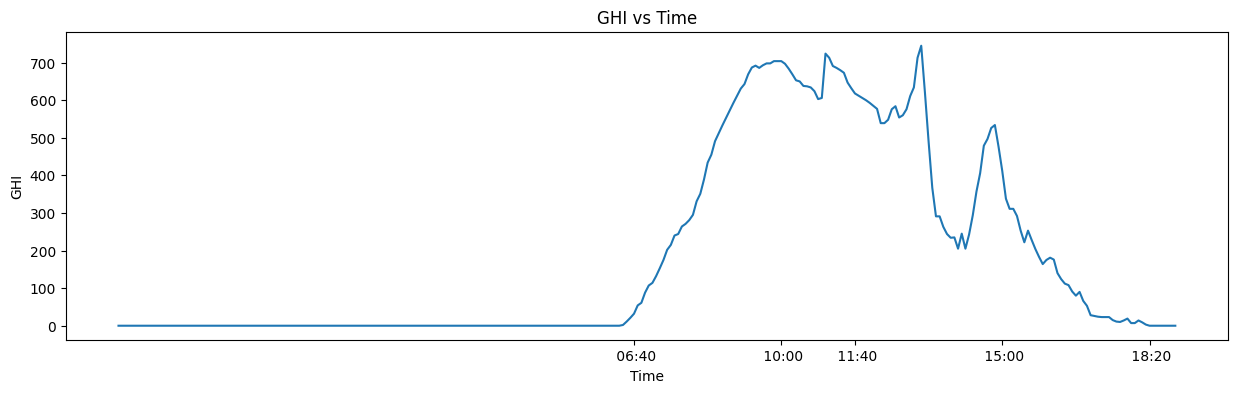

In [46]:
# grafica row_day
plt.figure(figsize=(15,4))
plt.plot(row_day['Time'], row_day['GHI'])
plt.title('GHI vs Time')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.xticks([140, 180, 200,240, 280])
plt.show()


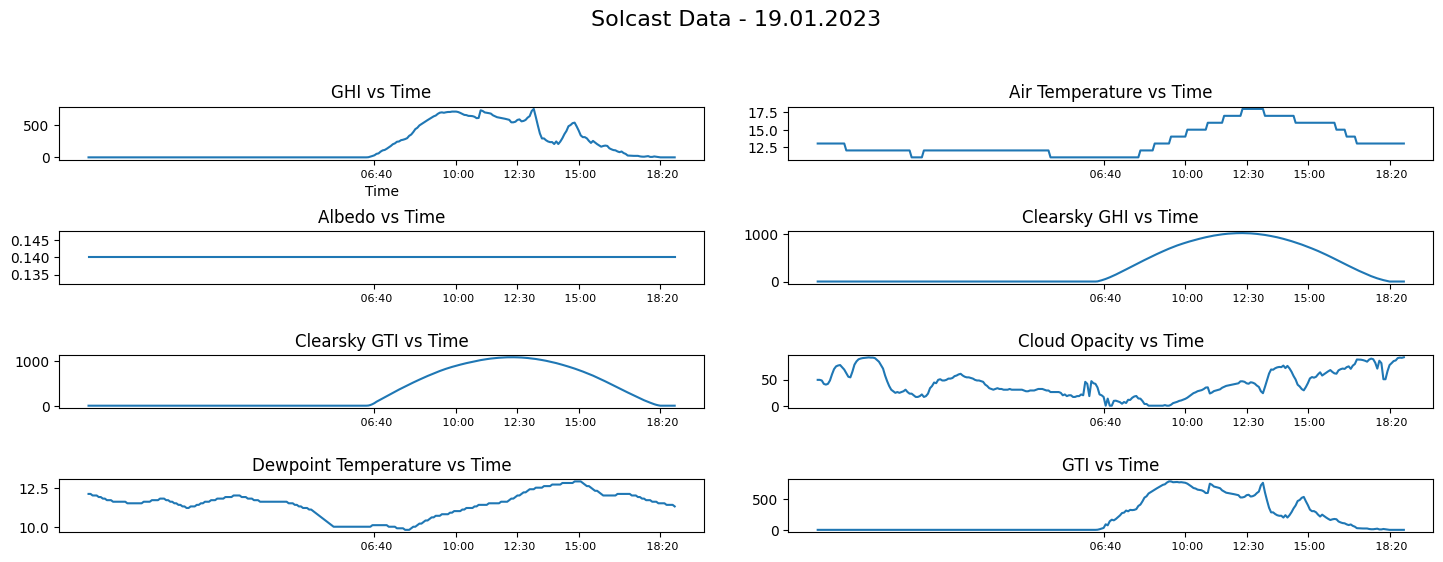

In [47]:
# multiplos graficos de todas las columnas de row_day
fig, ax = plt.subplots(4, 2, figsize=(15, 6))
fig.suptitle('Solcast Data - 19.01.2023', fontsize=16)
# ajustar espacio entre subplots
fig.tight_layout(pad=3.0)

ax[0, 0].plot(row_day['Time'], row_day['GHI'])
ax[0, 0].set_title('GHI vs Time')
ax[0, 0].set_xlabel('Time')
# ax[0, 0].set_ylabel('GHI')
ax[0, 0].set_xticks([140, 180, 210,240, 280])
ax[0, 0].tick_params(axis='x', labelsize=8)

# air_temp
ax[0, 1].plot(row_day['Time'], row_day['air_temp'])
ax[0, 1].set_title('Air Temperature vs Time')
# ax[0, 1].set_xlabel('Time')
# ax[0, 1].set_ylabel('Air Temperature')
ax[0, 1].set_xticks([140, 180, 210,240, 280])
ax[0, 1].tick_params(axis='x', labelsize=8)
# albedo
ax[1, 0].plot(row_day['Time'], row_day['albedo'])
ax[1, 0].set_title('Albedo vs Time')
# ax[1, 0].set_xlabel('Time')
# ax[1, 0].set_ylabel('Albedo')
ax[1, 0].set_xticks([140, 180, 210,240, 280])
ax[1, 0].tick_params(axis='x', labelsize=8)
# clearsky_ghi
ax[1, 1].plot(row_day['Time'], row_day['clearsky_ghi'])
ax[1, 1].set_title('Clearsky GHI vs Time')
# ax[1, 1].set_xlabel('Time')
# ax[1, 1].set_ylabel('Clearsky GHI')
ax[1, 1].set_xticks([140, 180, 210,240, 280])
ax[1, 1].tick_params(axis='x', labelsize=8)
#clearsky_gti
ax[2, 0].plot(row_day['Time'], row_day['clearsky_gti'])
ax[2, 0].set_title('Clearsky GTI vs Time')
# ax[2, 0].set_xlabel('Time')
# ax[2, 0].set_ylabel('Clearsky GTI')
ax[2, 0].set_xticks([140, 180, 210,240, 280])
ax[2, 0].tick_params(axis='x', labelsize=8)
#cloud_opacity
ax[2, 1].plot(row_day['Time'], row_day['cloud_opacity'])
ax[2, 1].set_title('Cloud Opacity vs Time')
# ax[2, 1].set_xlabel('Time')
# ax[2, 1].set_ylabel('Cloud Opacity')
ax[2, 1].set_xticks([140, 180, 210,240, 280])
ax[2, 1].tick_params(axis='x', labelsize=8)
#dewpoint_temp
ax[3, 0].plot(row_day['Time'], row_day['dewpoint_temp'])
ax[3, 0].set_title('Dewpoint Temperature vs Time')
# ax[3, 0].set_xlabel('Time')
# ax[3, 0].set_ylabel('Dewpoint Temperature')
ax[3, 0].set_xticks([140, 180, 210,240, 280])
ax[3, 0].tick_params(axis='x', labelsize=8)
#gti
ax[3, 1].plot(row_day['Time'], row_day['gti'])
ax[3, 1].set_title('GTI vs Time')
# ax[3, 1].set_xlabel('Time')
# ax[3, 1].set_ylabel('GTI')
ax[3, 1].set_xticks([140, 180, 210,240, 280])
ax[3, 1].tick_params(axis='x', labelsize=8)


plt.show()


- #### air_temp:   Temperatura del aire a 2 metros por encima del nivel de la superficie.

- #### clearsky_ghi: Irradancia total en una superficie horizontal si no existieran nubes.

- #### clearsky_gti: Irradiación total recibida en una superficie si no hay nubes, con inclinación y azimuth (suma de componentes directos, difursis y reflejados) fijo o de seguimiento.

- #### cloud_opacity: Atenuación de la luz solar debido a la nube. 

- #### dewpoint_temp: Temperatura del punto de rocio a 2 metros sobre el nivel de la superficie. (La temperatura del punto de rocío es la temperatura a la que el aire debe enfriarse, a presión constante, para que se sature con vapor de agua y se forme rocío. )

- #### gti: Irradiancia total recibida sobre una superficie con inclinación y asimut definidos (suma de componenetes directos, difusos y reflejados ). Fijos o de seguimiento 



## Overlays Graph 

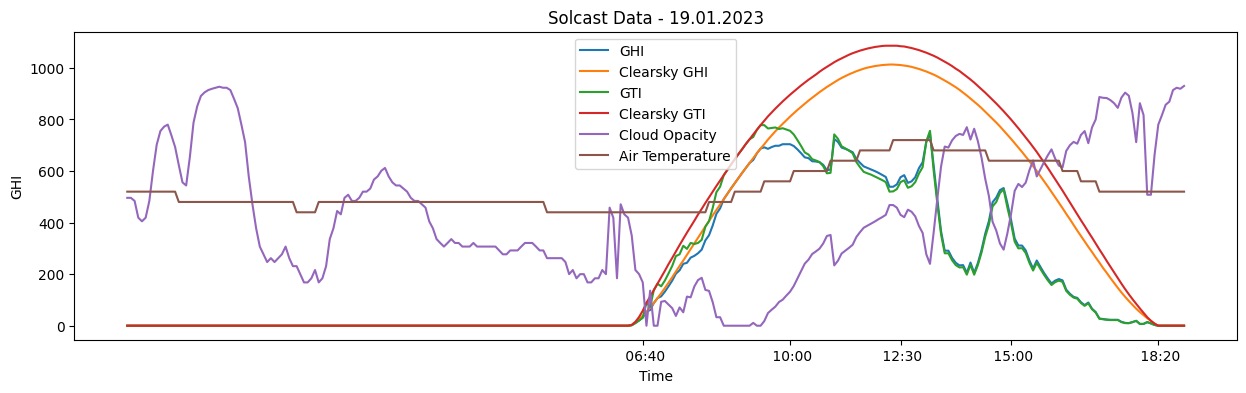

In [48]:
# grafica GHI y clearsky_ghi vs Time
plt.figure(figsize=(15,4))
plt.plot(row_day['Time'], row_day['GHI'], label='GHI')
plt.plot(row_day['Time'], row_day['clearsky_ghi'], label='Clearsky GHI')
# incluir gti
plt.plot(row_day['Time'], row_day['gti'], label='GTI')
# incluir clearsky_gti
plt.plot(row_day['Time'], row_day['clearsky_gti'], label='Clearsky GTI')
# incluir cloud_opacity
plt.plot(row_day['Time'], row_day['cloud_opacity']*10, label='Cloud Opacity')
# incluir air_temp
plt.plot(row_day['Time'], row_day['air_temp']*40, label='Air Temperature')
plt.title('Solcast Data - 19.01.2023')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.legend()
plt.xticks([140, 180, 210,240, 280])
plt.show()


In [49]:
# valor máximo de la columna 'GHI' en el dataframe
max_ghi = df['GHI'].max()
print("max_ghi: ", max_ghi)

max_ghi:  1107
